<a href="https://colab.research.google.com/github/RSN601KRI/MyntraHack/blob/master/stone_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install `skin-tone-classifier`

In [1]:
! pip install skin-tone-classifier --upgrade
# Please don't use `pip install skin-tone-classifier[all] --upgrade` because the GUI mode is not compatible with Google Colab.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.5/116.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39407 sha256=929344c60628246e0d33d46accb5ae133f5f4b88f695e24f6cc3bbf1aae5cfe7
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


## Verify the installation

You can check the installed version by `stone -v`

In [2]:
! stone -v

stone 1.2.4


# Used in Python script or Jupyter Notebook

### Load necessary libraries

In [3]:
import stone

from google.colab.patches import cv2_imshow # Comment out this line in a python script. `cv2.imshow()` is disabled in Colab, because it causes Jupyter sessions to crash; see https://github.com/jupyter/notebook/issues/3935.

In [4]:
image_path = "https://raw.githubusercontent.com/ChenglongMa/SkinToneClassifier/main/docs/demo.png" # Use the demo.png stored in my repo

In [5]:
result = stone.process(image_path, image_type="color", return_report_image=True)

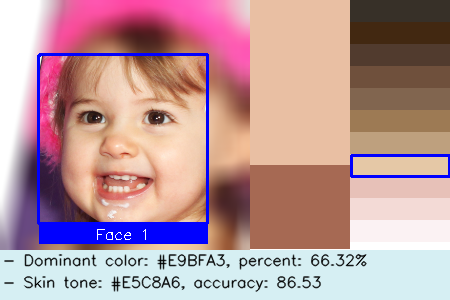

In [6]:
report_images = result.pop("report_images")  # obtain and remove the report image from the `result`

face_id = 1
cv2_imshow(report_images[face_id]) # Use `stone.show` instead in Python scripts

In [7]:
# convert the result to json
from json import dumps # Optional

result_json = dumps(result)
result_json

'{"basename": "demo", "extension": ".png", "image_type": "color", "faces": [{"dominant_colors": [{"color": "#E9BFA3", "percent": "0.66"}, {"color": "#A76A53", "percent": "0.34"}], "skin_tone": "#E5C8A6", "tone_label": "CH", "accuracy": 86.53, "face_id": 1}]}'

## Used as a [`command-line interface (CLI)`](https://en.wikipedia.org/wiki/Command-line_interface) tool

*NOTE*: The following is just a **simulation** for use on the CLI.

Please remove the *exclamation point* (!) before the command during normal use, see a
Please refer to https://github.com/ChenglongMa/SkinToneClassifier#how-to-use for more details.

In [8]:
! stone -i https://raw.githubusercontent.com/ChenglongMa/SkinToneClassifier/main/docs/demo.png --debug

The program is processing your images...
Please wait for the program to finish.
Processing demo: 100% 1/1 [00:00<00:00,  2.84images/s, Image Type=color, #Faces=1, Face ID=1, Skin Tone=#E5C8A6, Label=CH, Accuracy=86.5]


Also, you can process multiple images:

In [9]:
! stone -i https://raw.githubusercontent.com/ChenglongMa/SkinToneClassifier/main/docs/demo.png https://raw.githubusercontent.com/ChenglongMa/SkinToneClassifier/main/docs/demo_bw.png --debug

The program is processing your images...
Please wait for the program to finish.
Processing demo_bw: 100% 2/2 [00:00<00:00,  4.66images/s, Image Type=bw, #Faces=1, Face ID=1, Skin Tone=#D0D0D0, Label=BD, Accuracy=92.2]


You can click the <kbd>Files</kbd> button on the left to see the outputs, which include `./debug`, and `./result.csv`.

In [10]:
!ls

debug  log  result_bak_2407141739.csv  result.csv  sample_data


Here we just use some Python commands to show the content of results (report images and csv file).

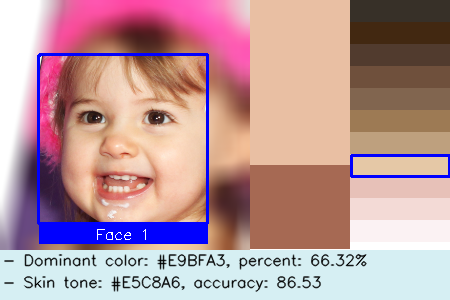

In [11]:
from IPython.display import Image
Image('./debug/color/faces_1/demo-1.png')

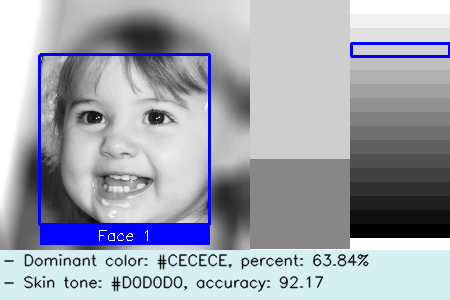

In [12]:
Image('./debug/bw/faces_1/demo_bw-1.png')

In [13]:
import pandas as pd

pd.read_csv("./result.csv")

,file,image type,face id,dominant 1,percent 1,dominant 2,percent 2,skin tone,tone label,accuracy(0-100)
0,demo.png,color,1,#E9BFA3,0.66,#A76A53,0.34,#E5C8A6,CH,86.53
1,demo_bw.png,bw,1,#CECECE,0.64,#878787,0.36,#D0D0D0,BD,92.17


If you have any question or suggestion, please feel free to open a new [Issue](https://github.com/ChenglongMa/SkinToneClassifier/issues) or [Discussion](https://github.com/ChenglongMa/SkinToneClassifier/discussions).

Thanks!